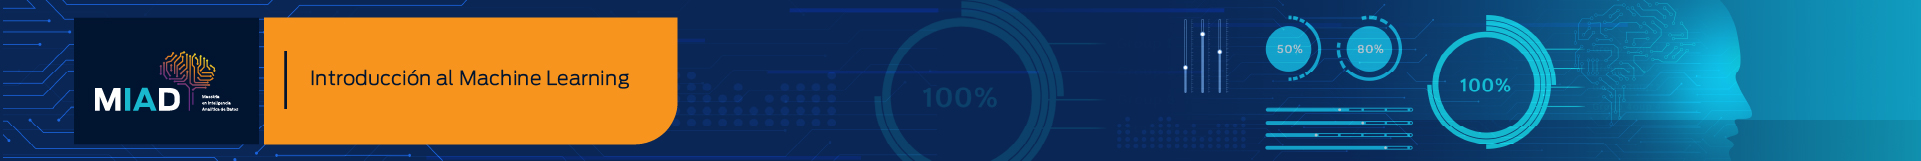

# Introducción al Machine Learning - Semana 2
## Caso: Modelos lineales para regresión, muestreo y selección del mejor modelo

### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para implementar modelos lineales y seleccionar aquel que tenga el mejor desempeño para resolver un problema de regresión. En particular, se deberán implementar modelos lineales de componentes principales, partial least squares y regularización.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Criterios de evaluación

Los criterios que se evaluarán son:   

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [10 puntos] 

Estimación del modelo usando componentes principales: Se estima el modelo usando componentes principales, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación del modelo usando PCA y el método forward: Se estima el modelo usando el método forward con componentes principales, se responde si es el mismo modelo del punto 2, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [30 puntos] 

Estimación del modelo de partial least squares: Se estima el modelo usando partial least squares, se evalúa en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación de un modelo de penalización: Se estima algún modelo de penalización, se evalúa en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [15 puntos] 

Elección del mejor modelo: Se elige el mejor modelo de acuerdo a los resultados obtenidos y se justifica adecuadamente la elección. [5 puntos] 


### Datos

Existe gran variedad de bases de datos reales disponibles en internet usadas por la comunidad académica para la evaluación de modelos predictivos.

En esta ocasión usarán una base de datos disponible en la página R-Data. Esta base de datos corresponde a "Hitters", la cual contiene 20 variables de jugadores de la Major League Baseball en las temporadas de 1986 y 1987. De esta manera, el objetivo de la actividad es predecir el salario de un jugador basado en las características que describen las variables predictivas.

Por lo anterior, en primer lugar deberán descargar la base de datos del siguiente enlace: https://drive.google.com/drive/folders/1YuWR657GDARSMPkUCVFNd2a5mX5zL16A?usp=sharing

Finalmente, para resolver los puntos de esta actividad deberán tener en cuenta únicamente las variables continuas (se deben eliminar las variables categóricas) y deberán eliminar las observaciones con datos faltantes.


### 1. Análisis preliminar de variables (10 puntos)
Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [77]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
hitters = pd.read_csv("Hitters.csv", index_col= 0)
hitters.head()

## Cambiamos los datos NaN por la media

hitters['Salary'].fillna(hitters['Salary'].mean(), inplace=True)

### Análisis de variables
### Salary 
#hitters.sum()
#print(hitters.describe())

/var/folders/94/1qftc2251rq1frpthqkbds7h0000gn/T/ipykernel_67559/105731588.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hitters['Salary'].fillna(hitters['Salary'].mean(), inplace=True)


In [78]:
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,535.925882,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000000,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000000,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000000,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500000,N


535.9258821292775


<Axes: xlabel='Salary', ylabel='Count'>

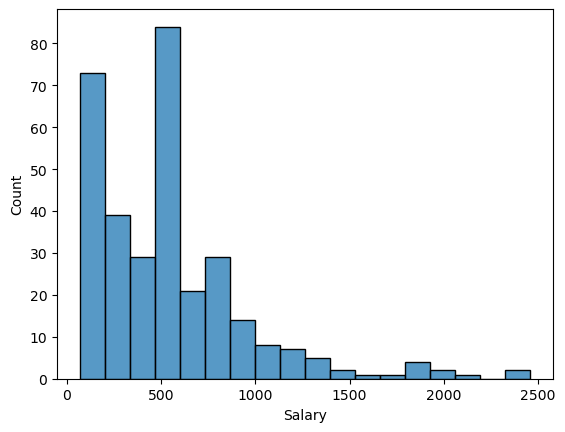

In [79]:
print(np.mean(hitters["Salary"]))
sns.histplot(hitters["Salary"])

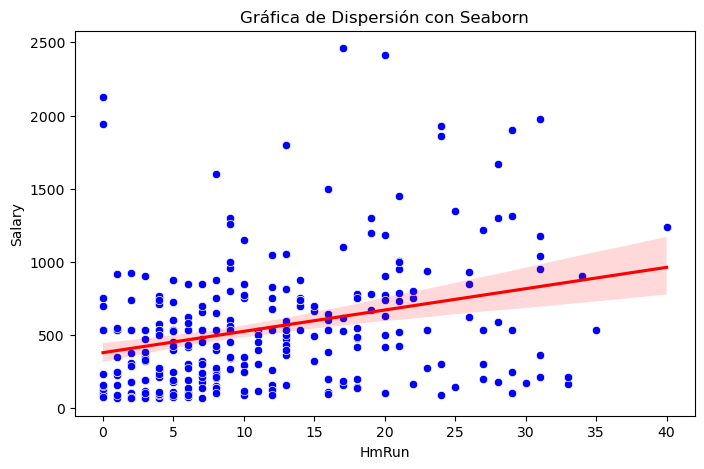

In [80]:
#### Dispersion entre Salario y Home Runs
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.scatterplot(x='HmRun', y='Salary', data=hitters, color='blue')
sns.regplot(x='HmRun', y='Salary', data=hitters, scatter=False, color='red')  # Línea de tendencia
plt.title('Gráfica de Dispersión con Seaborn')
plt.show()

In [81]:
### Aquí creamos la base de TRAIN y TEST
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

y_Total = hitters[['Salary']]
x_Total = hitters.drop(columns = ['Salary'])

# 🔹 Convertir variables categóricas en numéricas
for col in x_Total.select_dtypes(include=['object']).columns:
    encoder = LabelEncoder()
    x_Total[col] = encoder.fit_transform(x_Total[col].astype(str))



In [82]:
XTrain, XTest, yTrain, yTest = train_test_split(x_Total, y_Total, test_size=0.33, random_state=0)

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 1)

### 2. Estimación del modelo usando componentes principales (20 puntos)
Estimen un modelo predictivo usando la muestra de entrenamiento usando componentes principales y evalúen su desempeño en la muestra de test.

In [83]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####





(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 2)

### 3. Estimación del modelo usando PCA y el método forward (30 puntos)
Ahora construyan su propio algoritmo para hacer una regresión por componentes principales, en donde primero calculen los componentes y después realicen un proceso de selección de variables secuencial (forward) que permita encontrar el mejor modelo. Todo lo anterior en la muestra de entrenamiento.

Finalmente, evalúen el desempeño en test.

Una vez hecho este procedimiento respondan a la siguiente pregunta:

¿Es el mismo modelo del punto anterior (punto 2)? 

In [84]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [85]:
p = XTrain.shape[1]
datosTrain = len(yTrain)

In [86]:
r2adj = []
print(r2adj)

[]


In [87]:
# 🔹 Lista para almacenar R² ajustado
r2adj = []

for a in range(1, p + 1):
    if a < p:
        sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select=a, direction='forward')
        sfs.fit(XTrain, yTrain)
        XTrainSeleccionado = sfs.transform(XTrain)  # Se usa transform en vez de fit_transform nuevamente
        
        regAuxiliar = LinearRegression()
        regAuxiliar.fit(XTrainSeleccionado, yTrain)

        r2Modelo = regAuxiliar.score(XTrainSeleccionado, yTrain)
        r2adjModelo = 1 - (1 - r2Modelo) * (datosTrain - 1) / (datosTrain - a - 1)
        r2adj.append(r2adjModelo)
    else:
        regAuxiliar = LinearRegression()
        regAuxiliar.fit(XTrain, yTrain)
        r2Modelo = regAuxiliar.score(XTrain, yTrain)
        r2adjModelo = 1 - (1 - r2Modelo) * (datosTrain - 1) / (datosTrain - a - 1)
        r2adj.append(r2adjModelo)

    print(f"Evaluación del modelo con {a} variable(s)")

Evaluación del modelo con 1 variable(s)
Evaluación del modelo con 2 variable(s)
Evaluación del modelo con 3 variable(s)
Evaluación del modelo con 4 variable(s)
Evaluación del modelo con 5 variable(s)
Evaluación del modelo con 6 variable(s)
Evaluación del modelo con 7 variable(s)
Evaluación del modelo con 8 variable(s)
Evaluación del modelo con 9 variable(s)
Evaluación del modelo con 10 variable(s)
Evaluación del modelo con 11 variable(s)
Evaluación del modelo con 12 variable(s)
Evaluación del modelo con 13 variable(s)
Evaluación del modelo con 14 variable(s)
Evaluación del modelo con 15 variable(s)
Evaluación del modelo con 16 variable(s)
Evaluación del modelo con 17 variable(s)
Evaluación del modelo con 18 variable(s)
Evaluación del modelo con 19 variable(s)


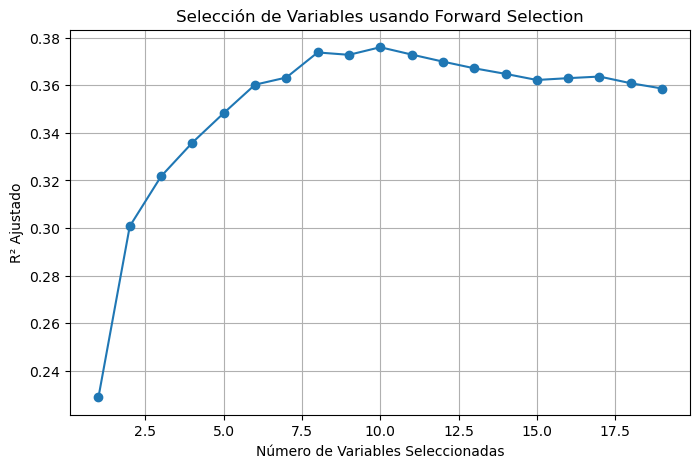

In [88]:
# 🔹 Gráfico de R² ajustado vs. número de variables
plt.figure(figsize=(8, 5))
plt.plot(range(1, p + 1), r2adj, marker='o', linestyle='-')
plt.xlabel("Número de Variables Seleccionadas")
plt.ylabel("R² Ajustado")
plt.title("Selección de Variables usando Forward Selection")
plt.grid()
plt.show()

In [97]:
nVariablesSeleccionadas = 10
if nVariablesSeleccionadas < p:
    sfsElegido = SequentialFeatureSelector(LinearRegression(), n_features_to_select=nVariablesSeleccionadas, direction='forward')
    sfsElegido.fit(XTrain, yTrain)
    XTrainSeleccionado = sfsElegido.transform(XTrain)
    modeloFwd = LinearRegression()
    modeloFwd.fit(XTrainSeleccionado, yTrain)
    variablesSeleccionadas = np.array(XTrain.columns)[sfsElegido.get_support()]
    # Obtener los índices de las columnas seleccionadas
    indices_seleccionados = np.where(sfsElegido.get_support())[0]
    # Obtener los números de las columnas (índices + 1)
    numeros_columnas = indices_seleccionados + 1
else:
    modeloFwd = LinearRegression()
    modeloFwd.fit(XTrain, yTrain)
    variablesSeleccionadas = XTrain.columns
    # Si se usan todas las variables, los números son del 1 al p
    numeros_columnas = np.arange(1, p + 1)

print(f"El número de variables seleccionadas es {nVariablesSeleccionadas} y corresponden a las columnas: {list(variablesSeleccionadas)} con los números: {list(numeros_columnas)}")


El número de variables seleccionadas es 10 y corresponden a las columnas: ['AtBat', 'Hits', 'Walks', 'Years', 'CRuns', 'CRBI', 'CWalks', 'Division', 'Assists', 'Errors'] con los números: [1, 2, 6, 7, 11, 12, 13, 15, 17, 18]


In [98]:
if nVariablesSeleccionadas < p:
    XTestSeleccionado = XTest[variablesSeleccionadas] # Selecciona las columnas por nombre
    prediccionFwd = modeloFwd.predict(XTestSeleccionado)
else:
    prediccionFwd = modeloFwd.predict(XTest) # No se seleccionan columnas si se usan todas

MSEFwd = mean_squared_error(yTest, prediccionFwd)
mensaje = ['El MSE de la regresión lineal usando las variables seleccionadas por el método forward es:', str(MSEFwd)]
print(" ".join(mensaje))

El MSE de la regresión lineal usando las variables seleccionadas por el método forward es: 96331.19143053608


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### **PCAR**

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

En primer lugar, estadarizamos los predictores:

In [100]:
scaler = StandardScaler()
scaler.fit(XTrain)
XEscaladoTrain=scaler.transform(XTrain)

Ahora, calcularemos la matriz  𝐴
  usando la siguiente línea de código:

In [101]:
p=len(XEscaladoTrain[1,])
pca = PCA(n_components=p).fit(XEscaladoTrain)
A=pca.components_

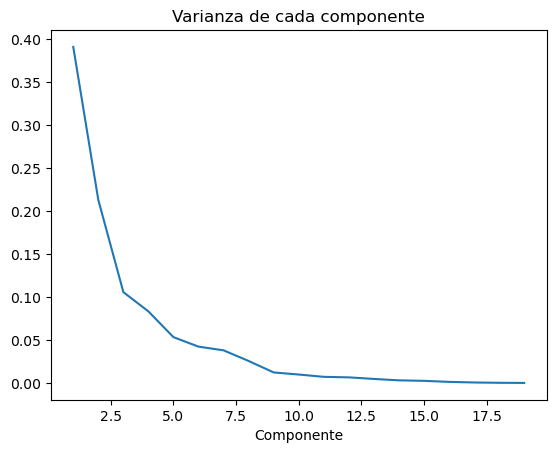

In [102]:
varianzaExplicada=pca.explained_variance_
porcentajeVarianzaExplicada=pca.explained_variance_ratio_
plt.plot(range(1,p+1),porcentajeVarianzaExplicada)
plt.xlabel('Componente')
plt.title('Varianza de cada componente')
plt.show()

porcentaje de la variabilidad explicado por las primeras  𝑗
  componentes. Para ello obtener dicho gráfico, ejecutaremos el siguiente código:

Dado que en el punto de seleccion de variable usando metodo forward se seleccionaron la variable predictoras las usaremos en la siguiente linea

In [103]:
nComponentesElegidas=nVariablesSeleccionadas 

ZTotalTrain=np.matmul(XEscaladoTrain,A)
ZTrain = ZTotalTrain[:,range(nComponentesElegidas)]

regPCA = LinearRegression()
regPCA.fit(ZTrain, yTrain)

LinearRegression()

Así, podemos proceder a hacer predicciones con la muestra de test. En primer lugar, centraremos los predictores de la muestra de evaluación con la misma transformación que se utilizó en train, Luego, usando la matriz  𝐴
  calculada anteriormente, se transforman las variables y se utilizan únicamente las componentes elegidas:

In [104]:
XEscaladoTest=scaler.transform(XTest)
ZTotalTest=np.matmul(XEscaladoTest,A)
ZTest = ZTotalTest[:,range(nComponentesElegidas)]

Finalmente, predecimos con el modelo estimado utilizando las variables transformadas para calcular el MSE en test:

prediccionPCA=regPCA.predict(ZTest)

In [105]:
prediccionPCA=regPCA.predict(ZTest)
MSEPCA=np.average(np.square(prediccionPCA-yTest))
print('MSE regresión por componentes principales:')
print(MSEPCA)

MSE regresión por componentes principales:
95174.56554928969


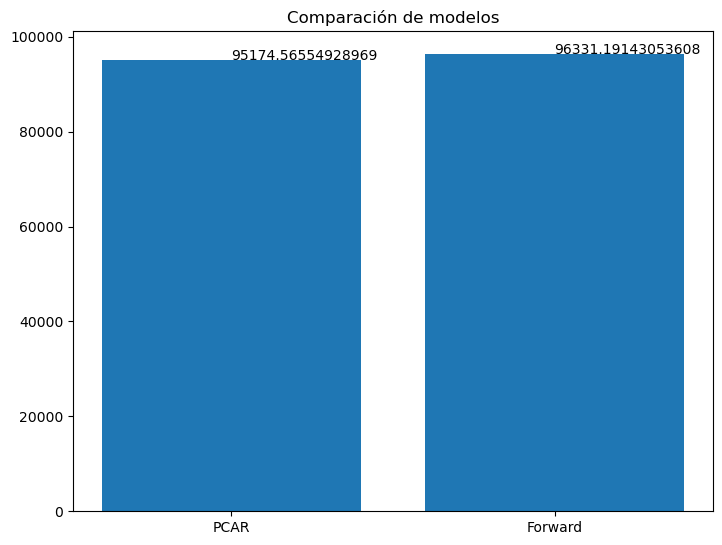

In [106]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['PCAR', 'Forward']
ejeY = [MSEPCA,MSEFwd]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 3)

### 4. Estimación del modelo de partial least squares (20 puntos)
Predigan usando partial least squares y evalúen en la muestra de test. Concluyan sobre el poder predictivo del modelo estimado.

In [10]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 4 ####





(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 4)

### 5. Estimación de un modelo de penalización (15 puntos)
Predigan usando un modelo de penalización y evalúen en la muestra de test. Concluyan sobre el poder predictivo del modelo estimado.

In [107]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 5 ####
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt

## Modelo de penalización tipo Ridge

n_alphas = 200

alphasCalibrar = np.logspace(-10, 2, n_alphas)
modeloRidge = RidgeCV(alphas=alphasCalibrar,store_cv_values=True).fit(XTrain, yTrain)

print('El parámetro de penalización óptimo es:')
print(modeloRidge.alpha_)
print('El valor del R^2 es:')
print(modeloRidge.score(XTrain, yTrain))
print('Los coeficientes estimados son:')
print(modeloRidge.coef_)

prediccionRidge=modeloRidge.predict(XTest)
MSERidge=np.average(np.square(prediccionRidge-yTest))
print('MSE regresión con penalización tipo Ridge:')
print(MSERidge)

El parámetro de penalización óptimo es:
32.92971255097148
El valor del R^2 es:
0.41229797965775883
Los coeficientes estimados son:
[[-2.18413584e+00  5.92356423e+00  5.87613019e-01 -2.69372435e-01
   1.78734020e+00  4.28370592e+00 -2.28328632e+01 -9.25941556e-02
  -1.40863018e-02 -8.62029441e-01  1.21577557e+00  9.79555710e-01
  -6.78891334e-01  1.36048183e+01 -6.26379683e+01  1.01801782e-01
   4.94644413e-01 -3.63717402e+00 -1.86540953e+00]]
MSE regresión con penalización tipo Ridge:
89861.74679835525


In [108]:
### Tipo LASSO
n_alphas = 200
alphasCalibrar = np.logspace(-10, 2, n_alphas)
modeloElastic = ElasticNetCV(alphas=alphasCalibrar,cv=5, random_state=0).fit(XTrain,yTrain)

print('El parámetro de penalización es:')
print(modeloElastic.alpha_)
print('El valor del R^2 es:')
print(modeloElastic.score(XTrain, yTrain))
print('Los coeficientes estimados son:')
print(modeloElastic.coef_)

prediccionElastic=modeloElastic.predict(XTest)
MSEElastic=np.average(np.square(prediccionElastic-yTest))
print('MSE regresión con penalización tipo Elastic Net:')
print(MSEElastic)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2664035.016535405, tolerance: 3056.5961006238804
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3471.7661786153913, tolerance: 3056.5961006238804
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarn

El parámetro de penalización es:
65.93188271333541
El valor del R^2 es:
0.38844845810588846
Los coeficientes estimados son:
[-1.54899265  3.77426865 -0.          1.16370445  1.56654438  3.18841795
 -0.45282387 -0.24108026  0.42208594 -0.64780871  0.99882981  0.89450022
 -0.49521134  0.         -0.          0.11623916  0.38173331 -0.05355972
  0.        ]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32962.864936448634, tolerance: 2778.226293993186
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40771.50944475457, tolerance: 2778.226293993186
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21125.669148836285, tolerance: 2778.226293993186
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:6

ValueError: Unable to coerce to Series, length must be 1: given 107

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 5)

### 6. Elección del mejor modelo (5 puntos)
¿Cuál modelo de los estimados en este caso resulta mejor para la predicción de la variable de respuesta? Justifiquen su respuesta.

(Utilicen este espacio para escribir su análisis y conclusiones sobre el punto 6)